In [2]:
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AHmSd08YoSVHCzpsi2aFWPlG8bPAGN6veC7qZjbYn8XLIK7IqAMnMM
Mounted at /content/drive/


##Data Preprocessing

In [5]:
path = "drive/My Drive/data/data/images"


In [7]:
cells = []
dots = []

for index in range(1,201):
    if index < 10:
        path_cells = str(path + f"/00{str(index)}" + "cell.png")
        path_dots = str(path + f"/00{str(index)}" + "dots.png")
    elif index < 100:
        path_cells = str(path + f"/0{str(index)}" + "cell.png")
        path_dots = str(path + f"/0{str(index)}" + "dots.png")
    elif index >= 100:
        path_cells = str(path + "/" + str(index) + "cell.png")
        path_dots = str(path + "/" + str(index) + "dots.png")

    cell = cv2.imread(path_cells)
    dot = cv2.imread(path_dots)
    #cells.append(cv2.cvtColor(cell, cv2.COLOR_BGR2GRAY))  #used to convert an image from one color space to another
    cells.append(cell)  #used to convert an image from one color space to another
    dots.append(cv2.countNonZero(cv2.imread(path_dots,0)))



In [8]:
cells = np.array(cells)
dots = np.array(dots)

## Splitting Data

In [9]:
size = int(200*0.2)

test_idx = np.random.randint(len(cells), size=size)
idx = np.arange(1,200) 
training_idx = np.setdiff1d(idx, test_idx)

training_cells, test_cells = cells[training_idx], cells[test_idx]
training_dots, test_dots = dots[training_idx], dots[test_idx]

print(training_cells.shape, test_cells.shape)
print(training_dots.shape, test_dots.shape)

(164, 256, 256, 3) (40, 256, 256, 3)
(164,) (40,)


##Model1

In [10]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
shape = ( 256, 256,3)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

m1 = keras.Sequential(layers=None, name=None)
m1.add(Rescaling(1./255, input_shape=shape))

m1.add(Conv2D(64, 3, activation='relu'))
m1.add(Conv2D(64, 3, activation='relu'))
m1.add(MaxPooling2D())

m1.add(Conv2D(64, 3, activation='relu'))
m1.add(Conv2D(64, 3, activation='relu'))
m1.add(MaxPooling2D())

m1.add(Conv2D(64, 3, activation='relu'))
m1.add(Conv2D(64, 3, activation='relu'))
m1.add(MaxPooling2D())

m1.add(Flatten())
m1.add(Dense(64, activation='relu'))
m1.add(Dense(1))
m1.summary()

"""model = tf.keras.Sequential()
model.add(m1)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1))
model.summary()"""


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0

"model = tf.keras.Sequential()\nmodel.add(m1)\nmodel.add(Flatten())\nmodel.add(Dense(128, activation='relu'))\nmodel.add(Dense(1))\nmodel.summary()"

In [13]:
m1.input_shape, m1.output_shape

((None, 256, 256, 3), (None, 1))

In [14]:
# compile model
m1.compile(optimizer='adam', loss='mse',metrics=[tf.keras.metrics.MeanSquaredError()])

In [15]:
EPOCHS=150

history = m1.fit( training_cells, training_dots, validation_data=(test_cells,test_dots), batch_size=16, epochs=EPOCHS)

Train on 164 samples, validate on 40 samples
Epoch 1/150
164/164 [==============================] - ETA: 0s - loss: 14957.3676 - mean_squared_error: 14957.3672WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
164/164 [==============================] - 4s 23ms/sample - loss: 14957.3676 - mean_squared_error: 14957.3672 - val_loss: 891.2595 - val_mean_squared_error: 891.2596
Epoch 2/150
164/164 [==============================] - 2s 13ms/sample - loss: 2305.0511 - mean_squared_error: 2305.0508 - val_loss: 2069.0749 - val_mean_squared_error: 2069.0750
Epoch 3/150
164/164 [==============================] - 2s 13ms/sample - loss: 1800.6434 - mean_squared_error: 1800.6434 - val_loss: 2135.0058 -

##Result Model1

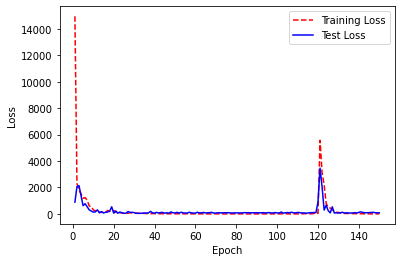

In [20]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(120) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [21]:
predicted = m1.predict(test_cells)

In [22]:
print(history.history['val_mean_squared_error'])
print(round(np.mean(np.abs(test_dots-predicted)),4))

[891.2596, 2069.075, 2135.0059, 1358.249, 623.75793, 772.4072, 536.79675, 305.46545, 221.7458, 136.3131, 153.86514, 310.48965, 78.482834, 171.76318, 71.63887, 127.272934, 142.59784, 210.7028, 538.3392, 54.71407, 224.85599, 52.010887, 137.13025, 93.12503, 45.262856, 53.47809, 181.103, 110.97432, 120.41978, 102.2521, 44.88485, 45.368416, 43.685028, 57.733955, 65.7455, 62.186504, 70.33144, 193.44083, 80.51017, 56.7501, 119.27767, 64.50133, 107.755295, 111.41786, 57.499023, 88.01484, 54.680367, 151.28537, 87.99917, 70.54483, 120.7084, 65.97379, 126.26311, 75.68611, 70.18972, 61.694664, 126.0094, 77.04629, 62.997326, 60.661785, 121.51072, 78.388695, 80.67389, 109.34104, 73.69847, 81.28865, 97.14296, 118.44179, 61.779694, 60.71598, 88.47855, 78.21818, 81.62489, 79.426605, 94.778015, 90.388306, 82.52698, 68.359886, 79.8759, 78.298546, 74.00761, 75.69985, 76.265335, 96.224, 90.7521, 80.93712, 84.42894, 85.34557, 81.649925, 84.58755, 87.358116, 79.84586, 93.618774, 76.6949, 80.0476, 101.74619, 

##Model2

In [27]:
m2 = keras.Sequential(layers=None, name=None)
m2.add(Rescaling(1./255, input_shape=shape))

m2.add(Conv2D(64, 3, activation=tf.keras.layers.LeakyReLU(alpha=0.3)))
m2.add(Conv2D(64, 3, activation=tf.keras.layers.LeakyReLU(alpha=0.3)))
m2.add(MaxPooling2D())

m2.add(Conv2D(64, 3, activation=tf.keras.layers.LeakyReLU(alpha=0.3)))
m2.add(Conv2D(64, 3, activation='relu'))
m2.add(MaxPooling2D())

m2.add(Conv2D(64, 3, activation=tf.keras.layers.LeakyReLU(alpha=0.3)))
m2.add(Conv2D(64, 3, activation=tf.keras.layers.LeakyReLU(alpha=0.3)))
m2.add(MaxPooling2D())

m2.add(Flatten())
m2.add(Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.3)))
m2.add(Dense(1))
m2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 252, 252, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 122, 122, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 61, 61, 64)       

In [28]:
# compile model
m2.compile(optimizer='adam', loss='mse',metrics=[tf.keras.metrics.MeanSquaredError()])

In [29]:
EPOCHS=120

history2 = m2.fit( training_cells, training_dots, validation_data=(test_cells,test_dots), batch_size=16, epochs=EPOCHS)

Train on 164 samples, validate on 40 samples
Epoch 1/120
164/164 [==============================] - 4s 23ms/sample - loss: 20731.4889 - mean_squared_error: 20731.4902 - val_loss: 17239.9678 - val_mean_squared_error: 17239.9668
Epoch 2/120
164/164 [==============================] - 3s 17ms/sample - loss: 10159.1490 - mean_squared_error: 10159.1484 - val_loss: 4506.2370 - val_mean_squared_error: 4506.2368
Epoch 3/120
164/164 [==============================] - 3s 17ms/sample - loss: 4173.9471 - mean_squared_error: 4173.9473 - val_loss: 866.2559 - val_mean_squared_error: 866.2560
Epoch 4/120
164/164 [==============================] - 3s 17ms/sample - loss: 1545.2526 - mean_squared_error: 1545.2527 - val_loss: 846.2687 - val_mean_squared_error: 846.2687
Epoch 5/120
164/164 [==============================] - 3s 17ms/sample - loss: 1124.5463 - mean_squared_error: 1124.5463 - val_loss: 697.6016 - val_mean_squared_error: 697.6017
Epoch 6/120
164/164 [==============================] - 3s 17ms/sa

##Result Model2

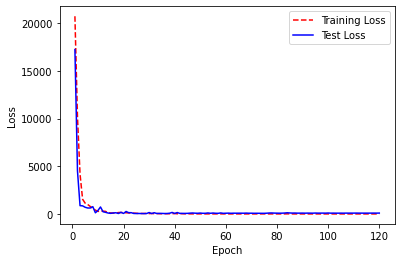

In [30]:
# Get training and test loss histories
training_loss2 = history2.history['loss']
test_loss2 = history2.history['val_loss']

# Create count of the number of epochs
epoch_count2 = range(1, len(training_loss2) + 1)

# Visualize loss history
plt.plot(epoch_count2, training_loss2, 'r--')
plt.plot(epoch_count2, test_loss2, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [31]:
predicted2 = m2.predict(test_cells)

In [35]:
print(np.min(history2.history['val_mean_squared_error']))
print(round(np.mean(np.abs(test_dots-predicted2)),4))

36.01463
62.7734
